# 2025-08-29 Stability

## Last time

* Discussion of JFE Editorial Policy
* Conditioning and well posedness
* Relative and absolute errors
* Condition numbers

## Today

* Stability of algorithms
* Forward and backward error
* Demo: computing volume of a polygon

In [3]:
using Plots
default(linewidth=4)

# Reliable = well-conditioned and stable

## Mathematical functions $f(x)$ can be ill-conditioned (big $\kappa$)
* Modeling is how we turn an abstract question into a mathematical function
* We want well-conditioned models (small $\kappa$)
* Some systems are intrinsically sensitive: fracture, chaotic systems, combustion

## Algorithms `f(x)` can be unstable
* Unreliable, though sometimes practical
* Unstable algorithms are constructed from ill-conditioned parts

# An ill-conditioned problem from Paul Olum

From [Surely You're Joking, Mr. Feynman](https://sistemas.fciencias.unam.mx/%7Ecompcuantica/RICHARD%20P.%20FEYNMAN-SURELY%20YOU%27RE%20JOKING%20MR.%20FEYNMAN.PDF) (page 113)

> So Paul is walking past the lunch place and these guys are all excited. "Hey, 
Paul!" they call out. "Feynman's terrific! We give him a problem that can be stated in ten 
seconds, and in a minute he gets the answer to 10 percent. Why don't you give him one?" 
Without hardly stopping, he says, "The tangent of 10 to the 100th." 
I was sunk: you have to divide by pi to 100 decimal places! It was hopeless.

What's the condition number?

$$ \kappa = |f'(x)| \frac{|x|}{|f|} $$

* $f(x) = \tan x$
* $f'(x) = 1 + \tan^2 x$

$$ \kappa = \lvert x \rvert \Bigl( \lvert \tan x \rvert + \bigl\lvert \frac{1}{\tan x} \bigr\rvert \Bigr) > \lvert x \rvert$$

In [4]:
tan(1e100)

-0.4116229628832498

In [5]:
tan(BigFloat("1e100", precision=100))

2.738770191194700792231947565702313204942361296608129856300353713193607246577622

# Forward and backward error



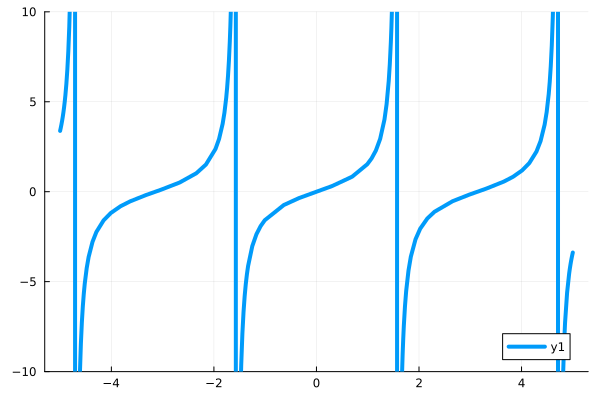

In [6]:
plot(tan, ylims=(-10, 10), x=LinRange(-10, 10, 1000))

## Read [Stability: Backward error](https://fncbook.com/stability/)

![](https://fncbook.com/build/backwarderror-55621e558c526e24b8fc1d61b00b65a3.svg)

* For ill-conditioned functions, the best we can hope for is small backward error.

* Feynman could have answered with any real number and it would have a (relative) backward error less than $10^{-100}$. All the numbers we saw on the previous slide had tiny backward error because

$$ \texttt{tan} \big( \operatorname{fl}(\underbrace{10^{100}}_x) \big) = \tan \big( \underbrace{10^{100} (1 + \epsilon)}_{\tilde x} \big) $$

for some $\epsilon < 10^{-100}$. (All real numbers can be written this way for some small $\epsilon$.)

# Go find some functions...

* Find a function $f(x)$ that models something you're interested in
* Plot its condition number $\kappa$ as a function of $x$
* Plot the relative error (using single or double precision; compare using Julia's `big`)
* Is the relative error ever much bigger than $\kappa \epsilon_{\text{machine}}$?
* Can you find what caused the instability?
* Share on Zulip

## Further reading: [FNC Introduction](https://fncbook.com/overview/)

# Stability demo: Volume of a polygon

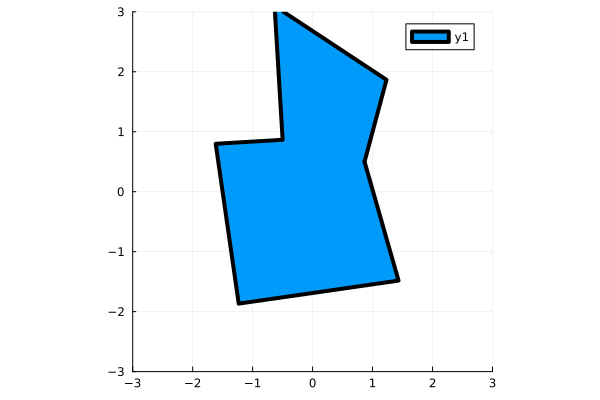

In [14]:
X = [1 0; 2 1; 1 3; 0 1; -1 1.5; -2 -1; .5 -2; 1 0]
R(θ) = [cos(θ) -sin(θ); sin(θ) cos(θ)]
Y = X * R(deg2rad(30))' .+ [0 0]
plot(Y[:,1], Y[:,2], seriestype=:shape, aspect_ratio=:equal, xlims=(-3, 3), ylims=(-3, 3))

In [13]:
using LinearAlgebra
function pvolume(X)
    n = size(X, 1)
    vol = sum(det(X[i:i+1, :]) / 2 for i in 1:n-1)
end

@show ref = pvolume(Y)
[det(Y[i:i+1, :]) for i in 1:size(Y, 1)-1]

ref = pvolume(Y) = 9.250000014901161


7-element Vector{Float64}:
  1.3660254137844387e8
  1.2320508575688776e8
 -2.2320507975688773e8
 -6.698728810778062e6
 -2.6650634694610968e8
  3.8397464121556126e7
  1.9820508275688773e8

What happens if this polygon is translated, perhaps far away?